In [2]:
import pandas as pd

In [5]:
file_path = '/Users/arayapatel/Downloads/2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
data = pd.read_csv(file_path)

In [6]:
print(data.head())

  User ID  Fan Challenges Completed  Predictive Accuracy (%)  \
0    U001                         5                       80   
1    U002                         8                       60   
2    U003                         3                       90   
3    U004                         7                       70   
4    U005                         2                       50   

   Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
0                              3                                    10   
1                              1                                     8   
2                              0                                     6   
3                              2                                    15   
4                              5                                     3   

   Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
0                      120                                       20  
1                      100    

In [7]:
print(data.isnull().sum())

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64


In [11]:
data.ffill(inplace=True)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
print(data.dtypes)

User ID                                    object
Fan Challenges Completed                    int64
Predictive Accuracy (%)                     int64
Virtual Merchandise Purchases               int64
Sponsorship Interactions (Ad Clicks)        int64
Time on Live 360 (mins)                     int64
Real-Time Chat Activity (Messages Sent)     int64
dtype: object


In [18]:
print(data.describe())

       Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   5.790000                74.990000   
std                    2.825908                14.033506   
min                    1.000000                50.000000   
25%                    3.000000                62.000000   
50%                    6.000000                77.000000   
75%                    8.000000                86.500000   
max                   10.000000                98.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                     100.000000                            100.000000   
mean                        2.670000                              8.680000   
std                         2.064882                              6.340315   
min                         0.000000                              0.000000   
25%                         1.000000                              2.0

In [22]:
average_challenges_completed = data['Fan Challenges Completed'].mean()
print(average_challenges_completed)

5.79


In [24]:
average_accuracy_challenges = data['Predictive Accuracy (%)'].mean()
print(average_accuracy_challenges)

74.99


In [25]:
average_merch_purchases = data['Virtual Merchandise Purchases'].mean()
print(average_merch_purchases)

2.67


In [26]:
average_interactions = data['Sponsorship Interactions (Ad Clicks)'].mean()
print(average_interactions)

8.68


In [27]:
average_time_live360 = data['Time on Live 360 (mins)'].mean()
print(average_time_live360)

129.35


In [28]:
average_messages_sent = data['Real-Time Chat Activity (Messages Sent)'].mean()
print(average_messages_sent)

25.05


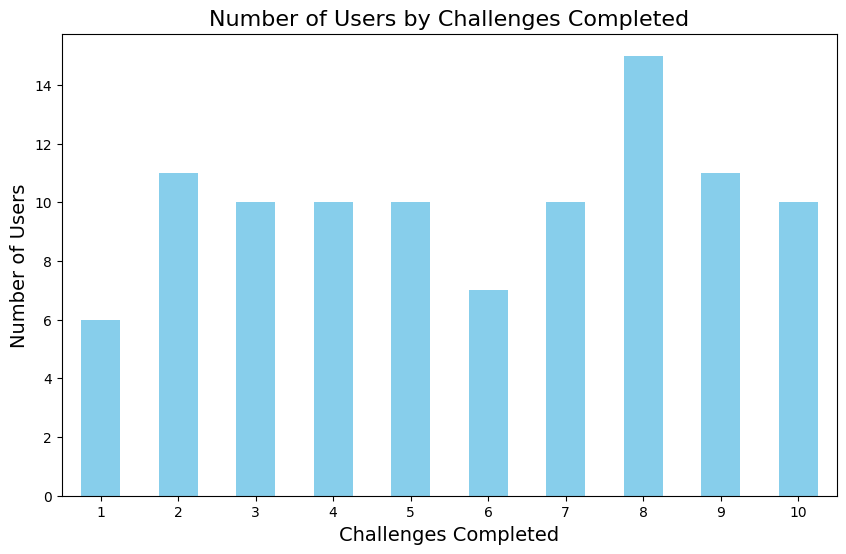

In [29]:
import matplotlib.pyplot as plt

# Group by the number of challenges completed and count the users
challenge_counts = data['Fan Challenges Completed'].value_counts().sort_index()

# bar chart
plt.figure(figsize=(10, 6))
challenge_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Users by Challenges Completed', fontsize=16)
plt.xlabel('Challenges Completed', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=0)  # Ensures the x-axis labels are horizontal
plt.show()

In [31]:
min_accuracy = data['Predictive Accuracy (%)'].min()
max_accuracy = data['Predictive Accuracy (%)'].max()
print(min_accuracy)
print(max_accuracy)

50
98


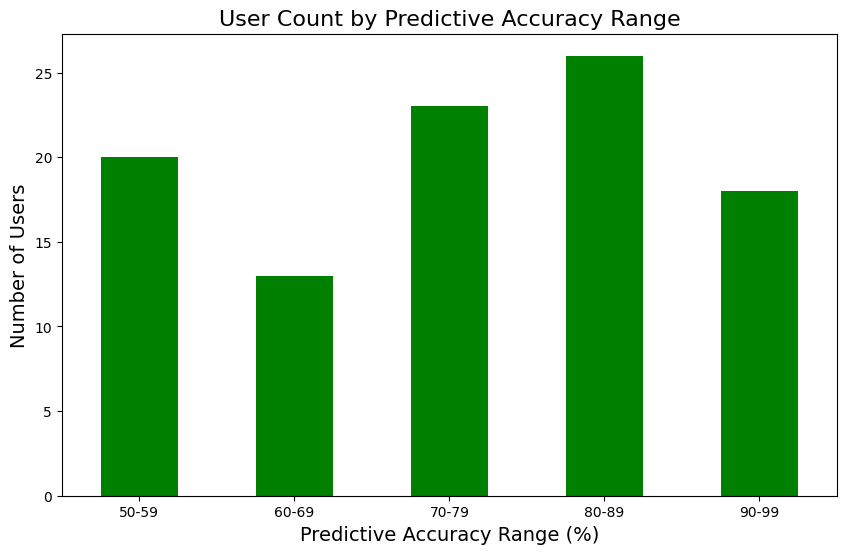

In [35]:
# Define the bins for the ranges (50-59, 60-69, ..., 90-99)
bins = [50, 60, 70, 80, 90, 100]
labels = ['50-59', '60-69', '70-79', '80-89', '90-99']

data['accuracy_range'] = pd.cut(data['Predictive Accuracy (%)'], bins=bins, labels=labels, right=False)

# number of users in each range
accuracy_counts = data['accuracy_range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
accuracy_counts.plot(kind='bar', color='green')

plt.title('User Count by Predictive Accuracy Range', fontsize=16)
plt.xlabel('Predictive Accuracy Range (%)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=0)  # horizontal

# Show the plot
plt.show()

In [36]:
min_purchases = data['Virtual Merchandise Purchases'].min()
max_purchases = data['Virtual Merchandise Purchases'].max()
print(min_purchases)
print(max_purchases)

0
6


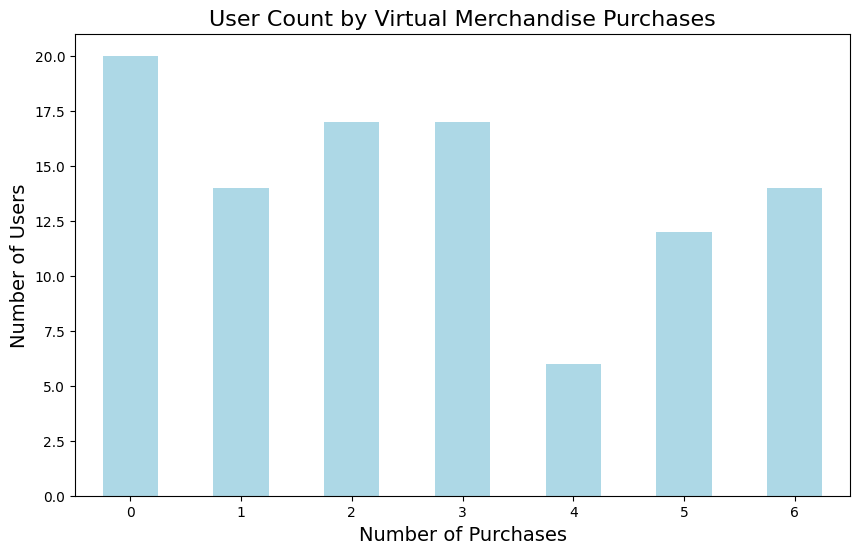

In [37]:
purchase_counts = data['Virtual Merchandise Purchases'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
purchase_counts.plot(kind='bar', color='lightblue')

# Add titles and labels
plt.title('User Count by Virtual Merchandise Purchases', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=0)

plt.show()

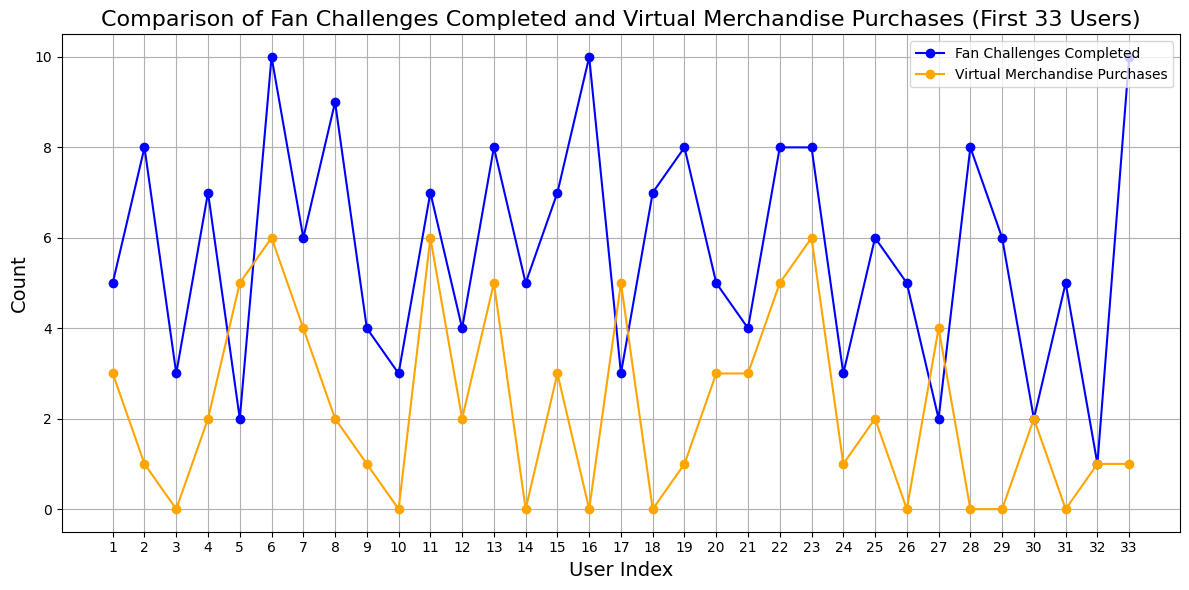

In [43]:
first_33_users = data.iloc[:33]

plt.figure(figsize=(12, 6))

plt.plot(first_33_users.index, first_33_users['Fan Challenges Completed'], label='Fan Challenges Completed', color='blue', marker='o')
plt.plot(first_33_users.index, first_33_users['Virtual Merchandise Purchases'], label='Virtual Merchandise Purchases', color='orange', marker='o')

plt.title('Comparison of Fan Challenges Completed and Virtual Merchandise Purchases (First 33 Users)', fontsize=16)
plt.xlabel('User Index', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=range(33), labels=range(1, 34))  # Show user index from 1 to 33

plt.legend()

plt.grid()
plt.tight_layout()
plt.show()

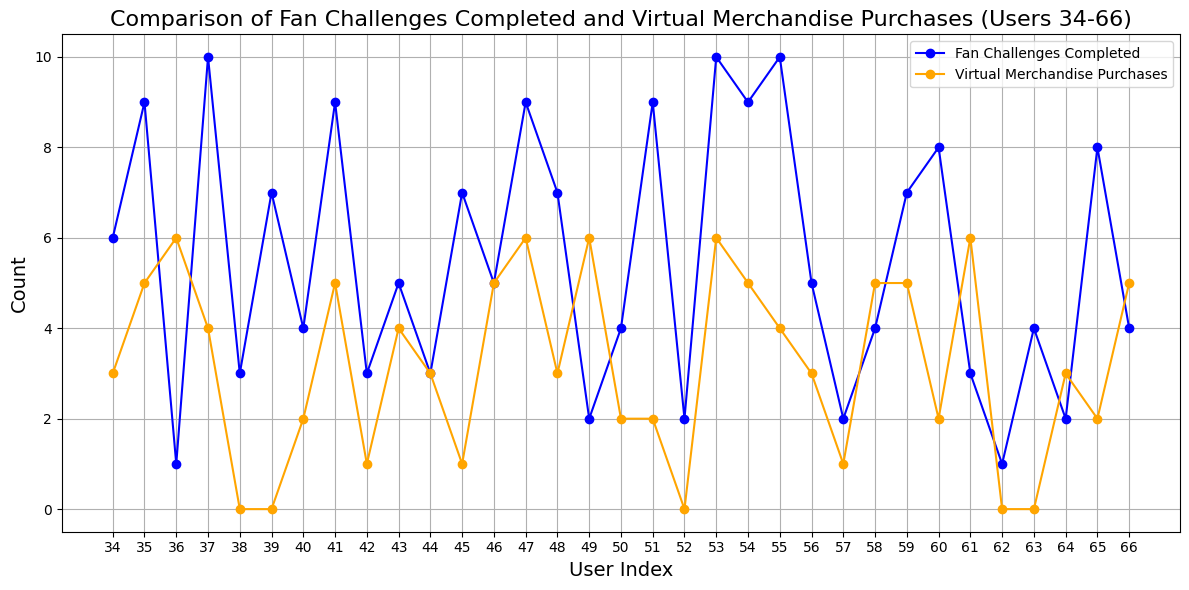

In [44]:
users_34_to_66 = data.iloc[33:66]

plt.figure(figsize=(12, 6))

plt.plot(users_34_to_66.index, users_34_to_66['Fan Challenges Completed'], label='Fan Challenges Completed', color='blue', marker='o')
plt.plot(users_34_to_66.index, users_34_to_66['Virtual Merchandise Purchases'], label='Virtual Merchandise Purchases', color='orange', marker='o')

plt.title('Comparison of Fan Challenges Completed and Virtual Merchandise Purchases (Users 34-66)', fontsize=16)
plt.xlabel('User Index', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=range(33, 66), labels=range(34, 67))  # Show user index from 34 to 66

plt.legend()

plt.grid()
plt.tight_layout()
plt.show()

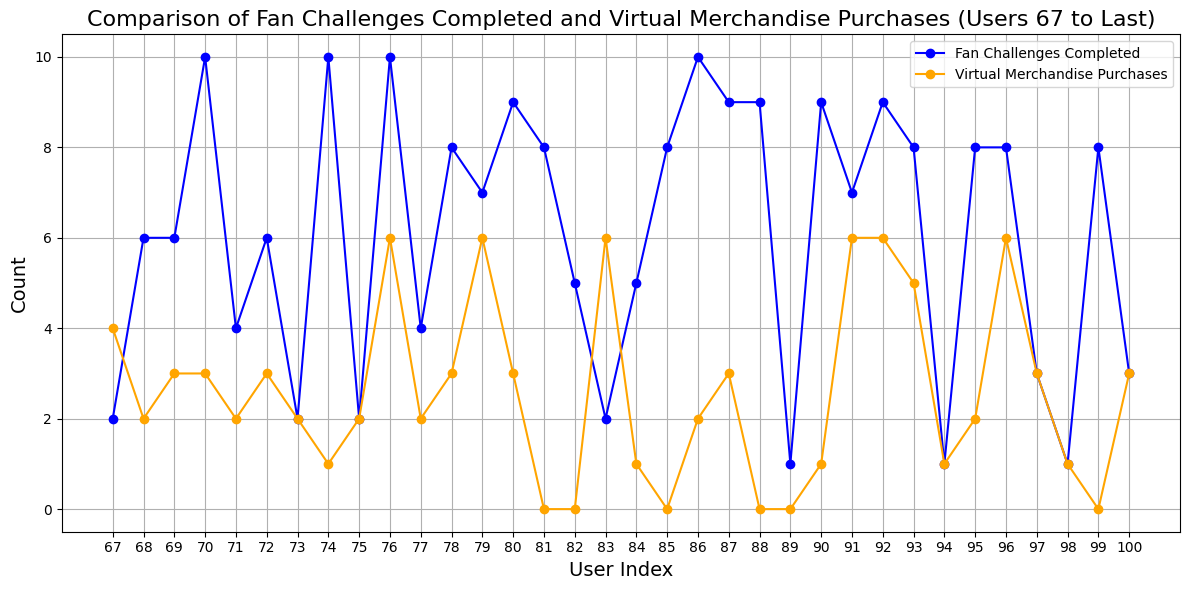

In [45]:
users_67_to_last = data.iloc[66:]  # Python uses 0-based indexing, so 66 is the 67th user

plt.figure(figsize=(12, 6))

plt.plot(users_67_to_last.index, users_67_to_last['Fan Challenges Completed'], label='Fan Challenges Completed', color='blue', marker='o')
plt.plot(users_67_to_last.index, users_67_to_last['Virtual Merchandise Purchases'], label='Virtual Merchandise Purchases', color='orange', marker='o')

plt.title('Comparison of Fan Challenges Completed and Virtual Merchandise Purchases (Users 67 to Last)', fontsize=16)
plt.xlabel('User Index', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=range(66, len(data)), labels=range(67, len(data) + 1))  # Show user index from 67 to the last user

plt.legend()

plt.grid()
plt.tight_layout()
plt.show()